In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#tokenise the data set
from nltk.tokenize import sent_tokenize, word_tokenize

In [4]:
data=pd.read_csv("/Users/shreekkanthkalyanasundaram/AIML/Capestone/Data Set - industrial_safety_and_health_database_with_accidents_description.csv")

In [5]:
data['Data']=pd.to_datetime(data.Data)
data['year']=data['Data'].apply(lambda x : x.year)
data['month']=data['Data'].apply(lambda x : x.month)
data['date']=data['Data'].apply(lambda x : x.day)

## EDA

In [6]:
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,year,month,date
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10


In [7]:
print("Number of rows = {0}\nNumber of Columns = {1} ".format(data.shape[0], data.shape[1]))

Number of rows = 425
Number of Columns = 14 


In [8]:
data.describe()

,Unnamed: 0,year,month,date
count,425.000000,425.000000,425.000000,425.000000
mean,224.084706,2016.329412,5.254118,14.981176
std,125.526786,0.470554,3.189959,8.661051
min,0.000000,2016.000000,1.000000,1.000000
25%,118.000000,2016.000000,3.000000,8.000000
50%,226.000000,2016.000000,5.000000,15.000000
75%,332.000000,2017.000000,7.000000,22.000000
max,438.000000,2017.000000,12.000000,31.000000


In [9]:
data.describe(include=object)

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
count,425,425,425,425,425,425,425,425,425
unique,3,12,3,5,6,2,3,33,411
top,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,On 02/03/17 during the soil sampling in the re...
freq,251,90,241,316,143,403,189,232,3


In [10]:
data.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description', 'year',
       'month', 'date'],
      dtype='object')

In [11]:
# Check for missing values
data.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
year                        0
month                       0
date                        0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
 11  year                      425 non-null    int64         
 12  month                 

In [13]:
data.drop_duplicates(inplace=True)
len(data)

425

In [14]:
# #Grouping and perform count over each group
data.groupby('Countries')['Countries'].count()

Countries
Country_01    251
Country_02    130
Country_03     44
Name: Countries, dtype: int64

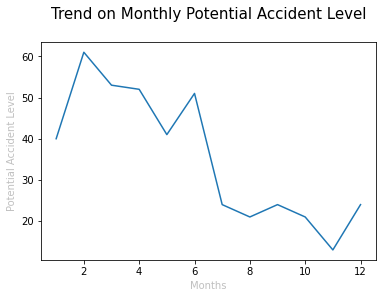

In [15]:
fig,(ax1) = plt.subplots()
ax1.set_title('Trend on Monthly Potential Accident Level\n',fontsize = 15)
data.groupby('month')['Potential Accident Level'].count().plot()
plt.xlabel('Months').set_color('silver')
plt.ylabel('Potential Accident Level').set_color('silver')
plt.show()

* Feb month got highest Potential Accident Level

In [16]:
data.groupby('year')['Potential Accident Level'].count()

year
2016    285
2017    140
Name: Potential Accident Level, dtype: int64

In [17]:
data['Data'].max()

Timestamp('2017-07-09 00:00:00')

In [18]:
data['Data'].min()

Timestamp('2016-01-01 00:00:00')

* count shows 2017 got less potential Accident Level but if we take a close look, 2017 got data till 9th of July that shows that trend of risk is increasing 

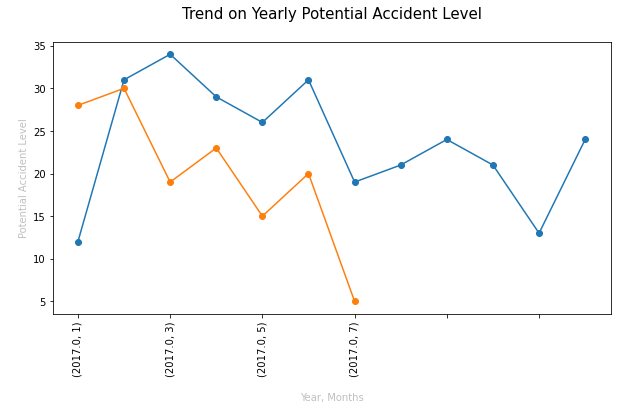

In [19]:
fig,(ax1) = plt.subplots()
ax1.set_title('Trend on Yearly Potential Accident Level\n',fontsize = 15)
data.groupby([data[data['year']==2016]['year'],'month'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
data.groupby([data[data['year']==2017]['year'],'month'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
plt.xlabel('\nYear, Months').set_color('silver')
plt.ylabel('\nPotential Accident Level').set_color('silver')
plt.xticks(rotation = 'vertical')

plt.show()

* Since 2017 data is available only till July 9th, we can also upsample 2017 data and perform the trend analysis

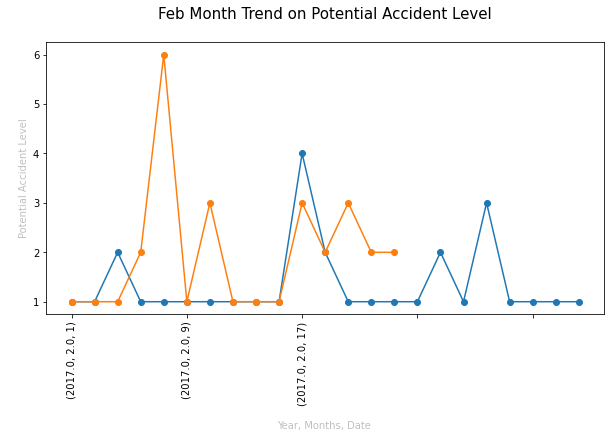

In [20]:
fig,(ax1) = plt.subplots()
ax1.set_title('Feb Month Trend on Potential Accident Level\n',fontsize = 15)
data.groupby([data[data['year']==2016]['year'],data[data['month']==2]['month'],'date'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
data.groupby([data[data['year']==2017]['year'],data[data['month']==2]['month'],'date'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
plt.xlabel('\nYear, Months, Date ').set_color('silver')
plt.ylabel('\nPotential Accident Level').set_color('silver')
plt.xticks(rotation = 'vertical')
plt.show()

* Per day Potential Accident count level was higher on 2017 Feb month, this shows trend is increase on 2017 

In [21]:
data.groupby('Potential Accident Level')['Potential Accident Level'].count()

Potential Accident Level
I       49
II      95
III    106
IV     143
V       31
VI       1
Name: Potential Accident Level, dtype: int64

<AxesSubplot:xlabel='Potential Accident Level', ylabel='count'>

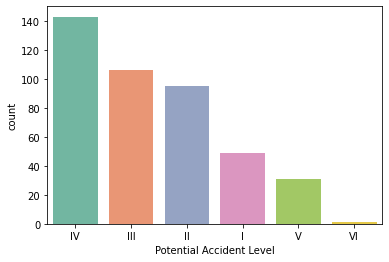

In [22]:
descending_order = data['Potential Accident Level'].value_counts().sort_values(ascending=False).index
sns.countplot(data=data,x=data['Potential Accident Level'],palette = "Set2",order=descending_order)

In [23]:
data.groupby('Genre')['Genre'].count()

Genre
Female     22
Male      403
Name: Genre, dtype: int64

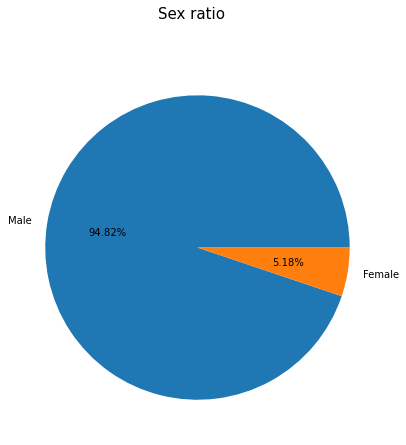

In [24]:

fig=plt.figure(figsize=(7,7))
fig.suptitle('Sex ratio', fontsize=15)
plt.pie(data['Genre'].value_counts(), labels=['Male', 'Female'], explode=(0,0),autopct = '%1.2f%%')
plt.show()


<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

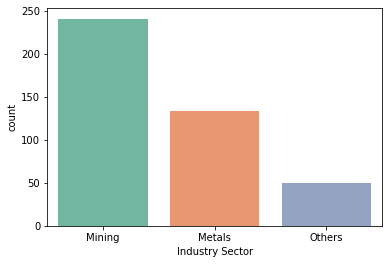

In [25]:
sns.countplot(data=data,x=data['Industry Sector'],palette = "Set2")


In [26]:
data.groupby('Critical Risk')['Critical Risk'].count().sort_values(ascending=False)

Critical Risk
Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Pressurized Systems                            7
remains of choco                               7
Fall prevention (same level)                   7
Fall prevention                                6
Suspended Loads                                6
Pressurized Systems / Chemical Substances      3
Blocking and isolation of energies             3
Power lock                                     3
Liquid Metal                                   3
Machine Protection                             2
Electr

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Pressed'),
  Text(2, 0, 'Manual Tools'),
  Text(3, 0, 'Chemical substances'),
  Text(4, 0, 'Venomous Animals'),
  Text(5, 0, 'Cut'),
  Text(6, 0, 'Projection'),
  Text(7, 0, 'Bees'),
  Text(8, 0, 'Fall'),
  Text(9, 0, 'Vehicles and Mobile Equipment'),
  Text(10, 0, 'remains of choco'),
  Text(11, 0, 'Fall prevention (same level)'),
  Text(12, 0, 'Pressurized Systems'),
  Text(13, 0, 'Suspended Loads'),
  Text(14, 0, 'Fall prevention'),
  Text(15, 0, 'Liquid Metal'),
  Text(16, 0, 'Power lock'),
  Text(17, 0, 'Blocking and isolation of energies'),
  Text(18, 0, 'Pressurized Systems / Chemical Substances'),
  Text(19, 0, 'Machine Protection'),
  Text(20, 0, 'Projection of fragments'),
  Text(21, 0, 'Electrical Shock'),
  Text(22, 0, 'Burn'),
  Text(23, 0, 'Electrical installation'),
  Text(24, 0, 'Confi

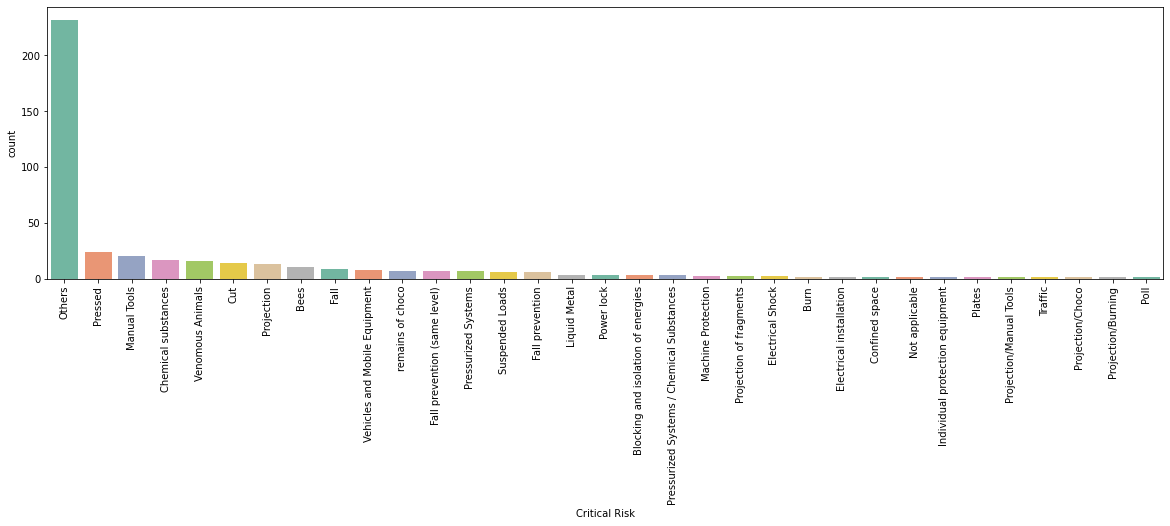

In [27]:
plt.figure(figsize=(20,5))
descending_order = data['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(data=data,x=data['Critical Risk'],palette = "Set2",order=descending_order)
plt.xticks(rotation = 'vertical')

In [28]:
# pd.pivot_table(data, index=['Countries','Local','Accident Level'],columns=['Local'], aggfunc=np.count_nonzero)

In [29]:
# pd.pivot_table(data, index=['Countries','Local','Potential Accident Level'],columns=['Local'], aggfunc=np.count_nonzero)

In [30]:
replace_struc = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
data['Local'] = data['Local'].map(replace_struc)
replace_struc = {'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4}
data['Accident Level'] = data['Accident Level'].map(replace_struc)
replace_struc = {'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4, 'VI': 5}
data['Potential Accident Level'] = data['Potential Accident Level'].map(replace_struc)
del replace_struc

In [31]:
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,year,month,date
0,0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1
1,1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2
2,2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6
3,3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8
4,4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10


## word cloud

In [32]:
# data[data['Potential Accident Level']==0]
# data['Description'][418]

In [33]:
#Function definition to generate Word cloud 
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))

def show_wordcloud(data,bg_color):
    wordcloud = WordCloud(
        background_color=bg_color,
        stopwords=stopwords,
        max_words=100,
        colormap='ocean_r',
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data).lower())

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
    print(wordcloud.words_.keys())
#     return set(wordcloud.words_.keys())


Potential Accident Level:  0


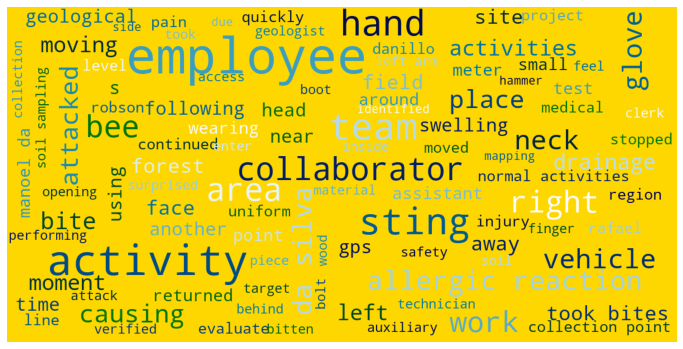

dict_keys(['employee', 'activity', 'team', 'sting', 'hand', 'collaborator', 'area', 'right', 'bee', 'work', 'vehicle', 'neck', 'glove', 'da silva', 'allergic reaction', 'causing', 'place', 'attacked', 'bite', 'left', 'moment', 'activities', 'drainage', 'moving', 'face', 'forest', 'away', 'field', 'site', 'took bites', 'head', 'near', 'geological', 'time', 'another', 'using', 's', 'following', 'gps', 'swelling', 'assistant', 'small', 'returned', 'point', 'wearing', 'around', 'meter', 'test', 'manoel da', 'injury', 'level', 'continued', 'moved', 'medical', 'project', 'quickly', 'evaluate', 'stopped', 'line', 'pain', 'region', 'rafael', 'danillo', 'uniform', 'robson', 'normal activities', 'collection point', 'bolt', 'auxiliary', 'material', 'safety', 'boot', 'wood', 'performing', 'clerk', 'opening', 'access', 'soil', 'behind', 'verified', 'enter', 'took', 'collection', 'target', 'inside', 'attack', 'surprised', 'geologist', 'finger', 'technician', 'bitten', 'piece', 'feel', 'soil sampling

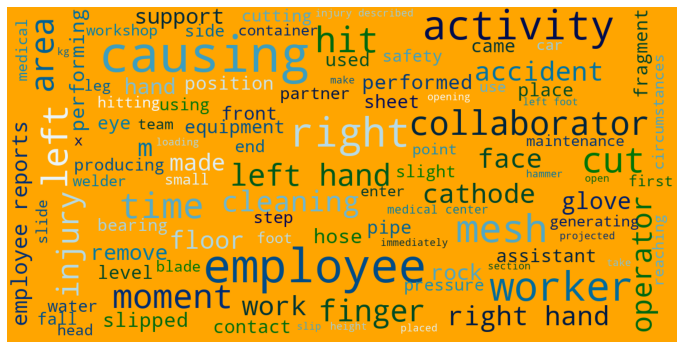

dict_keys(['causing', 'employee', 'right', 'worker', 'activity', 'mesh', 'left', 'hit', 'cut', 'time', 'moment', 'collaborator', 'area', 'injury', 'finger', 'left hand', 'operator', 'cleaning', 'cathode', 'face', 'work', 'accident', 'right hand', 'floor', 'm', 'made', 'glove', 'hand', 'support', 'rock', 'remove', 'employee reports', 'performing', 'slipped', 'performed', 'hose', 'front', 'pipe', 'eye', 'equipment', 'sheet', 'place', 'level', 'fragment', 'used', 'assistant', 'came', 'position', 'contact', 'producing', 'bearing', 'end', 'safety', 'using', 'cutting', 'partner', 'water', 'slight', 'fall', 'side', 'step', 'pressure', 'medical', 'first', 'leg', 'container', 'enter', 'slide', 'blade', 'small', 'use', 'generating', 'point', 'x', 'hitting', 'team', 'workshop', 'foot', 'welder', 'maintenance', 'circumstances', 'car', 'reaching', 'head', 'medical center', 'injury described', 'left foot', 'section', 'height', 'immediately', 'projected', 'hammer', 'open', 'loading', 'opening', 'kg',

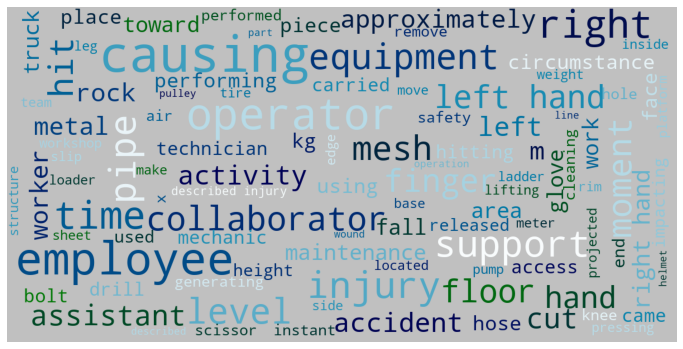

dict_keys(['causing', 'employee', 'operator', 'time', 'right', 'injury', 'pipe', 'support', 'level', 'equipment', 'collaborator', 'mesh', 'hit', 'moment', 'finger', 'floor', 'left hand', 'hand', 'assistant', 'cut', 'left', 'accident', 'activity', 'rock', 'approximately', 'm', 'worker', 'metal', 'right hand', 'work', 'area', 'truck', 'fall', 'maintenance', 'glove', 'toward', 'performing', 'hose', 'kg', 'using', 'piece', 'circumstance', 'face', 'place', 'hitting', 'mechanic', 'technician', 'access', 'came', 'carried', 'drill', 'bolt', 'end', 'impacting', 'released', 'height', 'used', 'safety', 'instant', 'generating', 'performed', 'cleaning', 'air', 'remove', 'scissor', 'x', 'knee', 'hole', 'located', 'pump', 'inside', 'side', 'loader', 'move', 'pressing', 'ladder', 'base', 'edge', 'team', 'structure', 'projected', 'workshop', 'meter', 'platform', 'weight', 'lifting', 'leg', 'sheet', 'rim', 'tire', 'make', 'slip', 'described injury', 'part', 'operation', 'wound', 'pulley', 'described', '

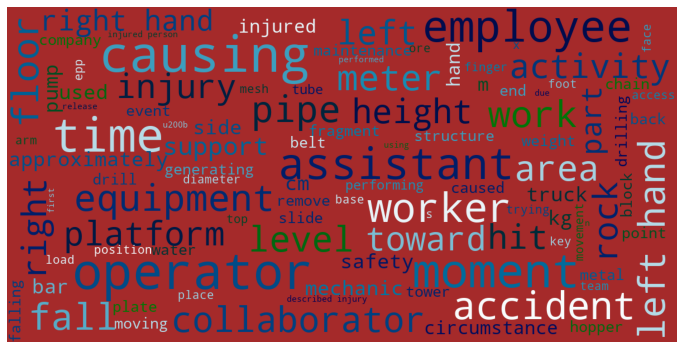

dict_keys(['causing', 'operator', 'time', 'moment', 'employee', 'assistant', 'worker', 'accident', 'work', 'fall', 'equipment', 'pipe', 'floor', 'left hand', 'area', 'level', 'meter', 'collaborator', 'right', 'injury', 'toward', 'hit', 'left', 'activity', 'platform', 'height', 'rock', 'right hand', 'part', 'support', 'approximately', 'safety', 'truck', 'kg', 'bar', 'pump', 'used', 'mechanic', 'cm', 'side', 'circumstance', 'm', 'injured', 'hand', 'generating', 'fragment', 'end', 'drilling', 'drill', 'weight', 'structure', 'plate', 'block', 'maintenance', 'back', 'remove', 'water', 'event', 'tower', 'metal', 'chain', 'belt', 'hopper', 'slide', 'point', 'company', 'falling', 'moving', 'caused', 'performing', 'tube', 'position', 'mesh', 'finger', 'ore', 'movement', 'trying', 'epp', 'foot', 'face', 'top', 'diameter', 'place', 'access', 'arm', 'key', 'base', 's', 'team', 'x', 'load', 'described injury', 'injured person', 'performed', 'first', 'u200b', 'using', 'n', 'release', 'due'])

Potent

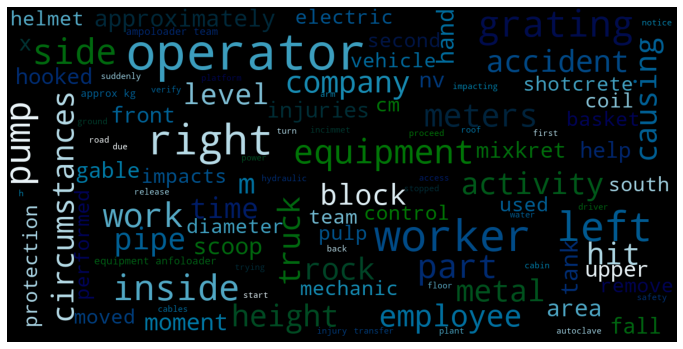

dict_keys(['operator', 'worker', 'right', 'left', 'grating', 'inside', 'pump', 'side', 'equipment', 'work', 'part', 'meters', 'causing', 'circumstances', 'height', 'activity', 'truck', 'company', 'rock', 'accident', 'pipe', 'metal', 'employee', 'hit', 'm', 'block', 'time', 'level', 'approximately', 'area', 'moment', 'tank', 'hand', 'scoop', 'nv', 'mixkret', 'help', 'front', 'gable', 'injuries', 'upper', 'hooked', 'x', 'fall', 'remove', 'electric', 'shotcrete', 'team', 'coil', 'basket', 'impacts', 'protection', 'used', 'diameter', 'cm', 'helmet', 'second', 'moved', 'control', 'pulp', 'vehicle', 'performed', 'south', 'mechanic', 'equipment anfoloader', 'approx kg', 'ampoloader team', 'proceed', 'ground', 'injury', 'first', 'access', 'cables', 'notice', 'due', 'incimmet', 'impacting', 'back', 'cabin', 'safety', 'plant', 'suddenly', 'floor', 'transfer', 'h', 'trying', 'release', 'arm', 'power', 'autoclave', 'stopped', 'hydraulic', 'roof', 'driver', 'turn', 'road', 'verify', 'start', 'water

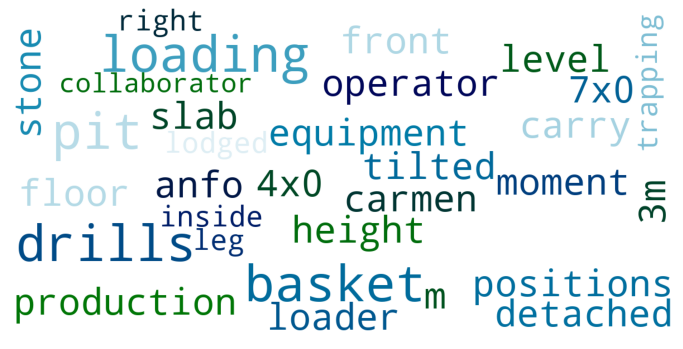

dict_keys(['loading', 'drills', 'pit', 'basket', 'process', 'carmen', 'level', 'operator', 'positions', 'anfo', 'loader', 'equipment', 'height', '3m', 'floor', 'carry', 'production', 'moment', 'stone', 'slab', '4x0', '7x0', 'm', 'detached', 'front', 'tilted', 'lodged', 'inside', 'trapping', 'right', 'leg', 'collaborator'])


In [34]:
#function call for word cloud & print the common words

bg_color=['gold','orange','silver','brown','black','white']   

# cloud={}
for i in range(0,6):  
   corpus=[]
   print('\nPotential Accident Level: ',i)
   for j in data[data['Potential Accident Level']==i].index:
        corpus.append(data['Description'][j])   
   show_wordcloud(corpus,bg_color[i])


## Remove common words

In [36]:
#generate corpus for each potential accident level categories
for i in range(0, 6):
    corpus=[]
    for j in data[data['Potential Accident Level']==i].index:
        corpus.append(data['Description'][j].lower()) 
    (globals()[f"corpus_{i}"])=corpus
print(corpus_5)  #sample

['during the process of loading drills in the carmen pit of level 3450, the operator positions the basket of the anfo loader 186 equipment at a height of 3m from the floor to carry out the loading of the production drills; at this moment, a stone slab of 1.4x0.7x0.2 m is detached from the front of the pit, which is tilted and lodged inside the basket, trapping the right leg of the collaborator.']


In [37]:
from nltk.tokenize import sent_tokenize, word_tokenize

#tokenize each documents of 'potential Accident level' categories   
words_5 = word_tokenize(str(corpus_5))
# print(words_5)
words_4 = word_tokenize(str(corpus_4))
# print(words_4)
words_3 = word_tokenize(str(corpus_3))
# print(words_4)
words_2 = word_tokenize(str(corpus_2))
# print(words_4)
words_1 = word_tokenize(str(corpus_1))
# print(words_4)
words_0 = word_tokenize(str(corpus_0))
# print(words_4)

In [38]:
#function to get the common words
def common_words(a,b,c,d,e,f):
  union_corpus = set.union(set(a),set(b),set(c),set(d),set(e),set(f))
  intersection_corpus = set.intersection(set(union_corpus),set(a),set(b),set(c),set(d),set(e),set(f))
  k=intersection_corpus
  return k
  
common_wordlist=list(common_words(words_0,words_1,words_2,words_3,words_4,words_5))
print(common_wordlist)

['loading', 'out', 'this', 'leg', ',', 'height', 'in', 'and', "'", 'inside', 'is', "'during", 'of', 'right', 'operator', 'which', 'from', ';', 'equipment', 'the', 'floor', ']', 'collaborator', '[', 'front', 'moment', 'a', 'at', 'level', '.', 'to']


* The symmetric difference of two sets A and B is the set of elements that are in either A or B, but not in their intersection.

In [39]:
data.loc[data['Description'].str.contains("collaborator", case=False)]

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,year,month,date
2,2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6
3,3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8
5,5,2016-01-12,Country_02,5,Metals,0,2,Male,Third Party (Remote),Pressurized Systems,During the unloading operation of the ustulado...,2016,1,12
6,6,2016-01-16,Country_02,5,Metals,0,2,Male,Employee,Fall prevention (same level),The collaborator reports that he was on street...,2016,1,16
9,9,2016-01-26,Country_01,6,Metals,0,1,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...,2016,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,420,2017-06-11,Country_01,1,Mining,0,3,Male,Third Party,Others,In circumstances that the driver of the plate ...,2017,6,11
408,422,2017-06-15,Country_01,3,Mining,0,3,Male,Employee,Projection,The convoy of the locomotive 15 operated by Mr...,2017,6,15
409,423,2017-06-17,Country_01,3,Mining,1,3,Male,Third Party,Projection,When the Master additive was taken from the AF...,2017,6,17
411,425,2017-06-24,Country_01,1,Mining,1,2,Male,Employee,Others,The injured and his collaborators at the time ...,2017,6,24


In [40]:
print(stopwords)

{"we're", 'doing', "i'd", 'we', 'itself', 'who', 'and', 'get', 'ever', 'so', 'same', 'ours', 'have', 'most', 'yourself', 'that', 'no', 'than', 'otherwise', 'about', "we'd", 'ourselves', 'not', 'very', 'once', 'from', 'whom', 'having', 'they', "hadn't", 'myself', 'or', "they've", "you'll", 'against', 'with', 'down', "won't", 'can', "you'd", 'did', 'on', "he's", 'those', 'my', 'could', 'out', "let's", 'be', "mustn't", 'up', 'cannot', 'again', 'you', 'yourselves', 'has', 'only', 'being', "hasn't", 'ought', "don't", 'http', "can't", "she's", "weren't", 'mr', 'hence', "i'm", "shouldn't", 'one', 'but', 'is', 'nor', 'of', 'off', 'two', "they'll", 'until', 'him', "he'd", 'her', 'when', 'few', 'just', 'me', "she'd", 'then', 'own', "they're", 'more', 'mrs', 'how', 'its', 'over', "wasn't", 'k', "haven't", 'he', 'a', 'i', 'since', 'do', 'by', 'to', 'such', "here's", 'this', 'would', "shan't", 'should', 'in', "we'll", 'are', 'before', 'into', "i've", "wouldn't", 'had', 'therefore', 'our', 'for', 'd

In [41]:
stopwords = set(STOPWORDS)
stopwords = stopwords.union(set(common_wordlist))

In [42]:
print(stopwords)

{"we're", 'doing', "i'd", 'we', 'itself', 'who', 'leg', "'", 'and', 'get', 'ever', 'so', 'same', 'ours', 'have', 'most', 'yourself', 'that', 'no', 'than', 'otherwise', 'about', "we'd", 'ourselves', 'not', 'very', 'once', 'from', 'whom', 'having', 'they', ';', "hadn't", 'equipment', 'myself', 'or', "they've", "you'll", 'against', 'with', 'down', "won't", 'can', "you'd", 'did', 'on', "he's", 'those', 'my', 'level', 'could', 'out', "let's", 'be', "mustn't", 'up', 'cannot', 'again', 'you', 'yourselves', 'has', 'only', 'being', "hasn't", 'ought', "don't", 'http', "can't", "she's", 'inside', "weren't", 'hence', "i'm", "shouldn't", 'but', 'is', 'nor', "'during", 'of', 'off', "they'll", 'until', 'him', "he'd", 'her', 'when', 'few', 'just', 'me', "she'd", 'then', 'own', "they're", 'more', 'how', 'its', 'over', "wasn't", 'k', "haven't", 'he', 'moment', 'a', 'i', 'since', 'do', 'by', 'to', 'such', "here's", 'this', 'would', "shan't", 'should', 'height', 'in', "we'll", 'are', 'before', 'into', "i'

#### Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase.

In [43]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import words,stopwords
import re
from spellchecker import SpellChecker

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

# nltk.download('words')
keep_words = words.words() 



lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 


spell = SpellChecker()

def preprocess(sentence):
    
    sentence=str(sentence)                    #converting each sentence to string
    
    sentence = sentence.lower()               #converting to lower case sentence
#     sentence=sentence.replace('{html}',"") 
                                              # replace characters other than [a-zA-Z0-9], digits & one or more spaces with single space
    cleanr = re.compile('\W\d\s')             #<.*?>$()+-/\,:;
    cleantext = re.sub(cleanr, '', sentence) 
                                              # to remove urls 
    rem_url=re.sub(r'https?\S+', ' ',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
                                              #tokenization only the word characters
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
                                              #remove stop words 
    filtered_words_1 = [w for w in tokens  if w not in stopwords.words('english')]
                                              #remove common words 
    filtered_words = [w for w in tokens  if w not in set(common_wordlist)]
                        
                                              # after spellcheck correction somit become vomit
    spellchk_words=[spell.correction(w) for w in filtered_words]
    
                                              #vocabulary and morphological analysis of words
    lemma_words=[lemmatizer.lemmatize(w) for w in spellchk_words]
    stem_words=[stemmer.stem(w) for w in lemma_words]
    
                        
#                                             #removing junk words like BZZZZZZZT,hmm on line 96
    processed_words=[x for x in stem_words if x in keep_words]
    return " ".join(processed_words)

data['cleantext']=data['Description'].progress_map(lambda s:preprocess(s))

  0%|          | 0/425 [00:00<?, ?it/s]

In [51]:
print("actual text:\n",data['Description'][421],"\n\nclean text:\n",data['cleantext'][421])

actual text:
 The collaborator moved from the infrastructure office (Julio to the toilets, when the pin of the right shoe is hooked on the bra of the left shoe causing not to take the step and fall untimely, causing injury described. 

clean text:
 move julio toilet when pin shoe hook on bra left shoe not take step fall


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

vectorizer = TfidfVectorizer()
vectorised_documents = vectorizer.fit_transform(data["cleantext"])


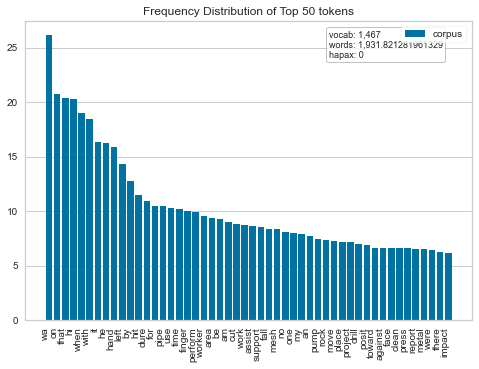

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [47]:
from yellowbrick.text import FreqDistVisualizer
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit_transform(vectorised_documents)
visualizer.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


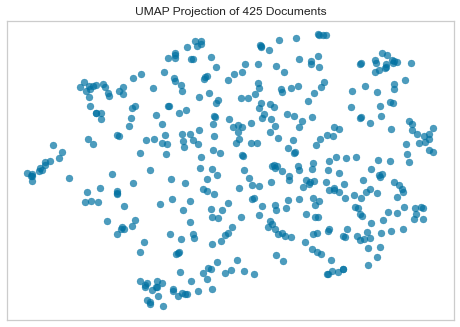

<AxesSubplot:title={'center':'UMAP Projection of 425 Documents'}>

In [48]:
from yellowbrick.text import UMAPVisualizer

umap = UMAPVisualizer(metric="cosine")
umap.fit(vectorised_documents)
umap.show()